In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

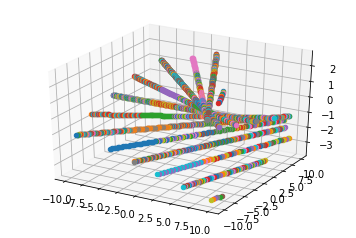

In [2]:
#超臨界ピッチフォーク分岐の可視化を流用したら失敗した
def f(x, r, h):
    return h+r*x-x**3

X=np.arange(-5, 5, 0.05)

R=np.arange(-10, 10, 0.05)
H=np.arange(-10, 10, 0.05)

fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')

for r in R:
    for h in H:
        for x in X:
            temp=f(x, r, h)
            if np.abs(temp)<1e-12:
                ax.scatter3D(r, h, x)

plt.grid()
plt.show()

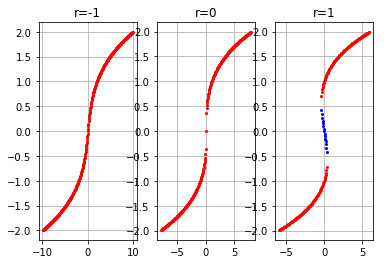

In [3]:
#r=-2, 0, 2の平面で分岐図を確認
def f(x, r, h):
    return h+r*x-x**3

X=np.arange(-5, 5, 0.05)
R=np.array([-1, 0, 1])
H=np.arange(-10, 10, 0.05)

plt.subplot(131)
plt.grid()
plt.title('r=-1')
r=R[0]
for h in H:
    x=np.arange(-2, 2, 0.01)
    x_d=f(x, r, h)

    i=1
    while i+1<x.shape[0]:
        if x_d[i]*x_d[i+1]<=0:
            tempx=x[i]+(x[i+1]-x[i])*x_d[i]/(x_d[i]-x_d[i+1])
            if x_d[i]>x_d[i+1]:
                plt.plot(h, tempx, marker='o', color='red', markersize=2)
            else:
                plt.plot(h, tempx, marker='o', color='blue', markersize=2)
        i+=1

plt.subplot(132)
plt.grid()
plt.title('r=0')
r=R[1]
for h in H:
    x=np.arange(-2, 2, 0.01)
    x_d=f(x, r, h)

    i=1
    while i+1<x.shape[0]:
        if x_d[i]*x_d[i+1]<=0:
            tempx=x[i]+(x[i+1]-x[i])*x_d[i]/(x_d[i]-x_d[i+1])
            if x_d[i]>x_d[i+1]:
                plt.plot(h, tempx, marker='o', color='red', markersize=2)
            else:
                plt.plot(h, tempx, marker='o', color='blue', markersize=2)
        i+=1
        
plt.subplot(133)
plt.grid()
plt.title('r=1')
r=R[2]
for h in H:
    x=np.arange(-2, 2, 0.01)
    x_d=f(x, r, h)

    i=1
    while i+1<x.shape[0]:
        if x_d[i]*x_d[i+1]<=0:
            tempx=x[i]+(x[i+1]-x[i])*x_d[i]/(x_d[i]-x_d[i+1])
            if x_d[i]>x_d[i+1]:
                plt.plot(h, tempx, marker='o', color='red', markersize=2)
            else:
                plt.plot(h, tempx, marker='o', color='blue', markersize=2)
        i+=1
        
plt.show()

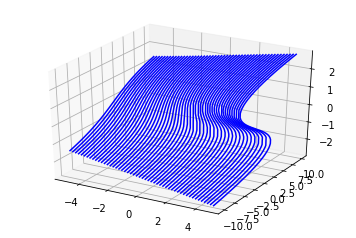

In [4]:
#カスプカタストロフィー面
def f(x, r, h):
    return h+r*x-x**3

X=np.arange(-5, 5, 0.01)
R=np.arange(-5, 5, 0.2)
H=np.arange(-10, 10, 0.2)

fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')

for r in R:
    temph=[]
    tempx=[]

    for h in H:
        x_d=f(X, r, h)

        i=0
        while i+1<x_d.shape[0]:
            if x_d[i]*x_d[i+1]<0:
                temph.append(h)
                tempx.append(X[i]+(X[i+1]-X[i])*x_d[i]/(x_d[i]-x_d[i+1]))
            i+=1
    
    i=len(tempx)-1
    while i>0:
        j=0
        while j<i:
            if tempx[j]<tempx[j+1]:
                temp=tempx[j]
                tempx[j]=tempx[j+1]
                tempx[j+1]=temp
                
                temp=temph[j]
                temph[j]=temph[j+1]
                temph[j+1]=temp
            j+=1
        i-=1
    ax.plot(np.ones(len(tempx))*r, temph, tempx, color='b')

plt.grid()
plt.show()